# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

 This study considers real data collected from a Portuguese retail bank, from
 May 2008 to June 2013, in total of 52944 phone contacts. The dataset is
 unbalanced, as only 6557 (12.38%) records are related with successes.

#### It represents 17 marketing campaigns 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, make_scorer)
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, make_scorer, 
                           precision_recall_curve, average_precision_score)

import warnings
warnings.filterwarnings('ignore')
# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 200)


In [36]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [38]:
# Basic information about the dataset
print("\n2. DATASET STRUCTURE")
print("-" * 50)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Display column information
print("\n3. COLUMN INFORMATION")
print("-" * 50)
print("\nData types:")
print(df.dtypes.value_counts())

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {', '.join(numerical_cols)}")
print(f"\nCategorical columns ({len(categorical_cols)}): {', '.join(categorical_cols)}")

# Check for missing values
print("\n4. MISSING VALUES ANALYSIS")
print("-" * 50)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")
else:
    print("Missing values per column:")
    print(missing_values[missing_values > 0])

# Display first few rows
print("\n5. SAMPLE DATA")
print("-" * 50)
print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())


2. DATASET STRUCTURE
--------------------------------------------------
Shape: 41,188 rows × 21 columns

3. COLUMN INFORMATION
--------------------------------------------------

Data types:
object     11
int64       5
float64     5
Name: count, dtype: int64

Numerical columns (10): age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

Categorical columns (11): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

4. MISSING VALUES ANALYSIS
--------------------------------------------------
✓ No missing values found in the dataset

5. SAMPLE DATA
--------------------------------------------------

First 5 rows:
   age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   may        

In [39]:
# ===================================
#  ANALYZE EACH COLUMN
# ===================================

print("\n3. DETAILED COLUMN ANALYSIS")
print("-" * 50)

# Analyze categorical columns that might need special treatment
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical columns analysis:")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_vals}")
    print(f"  Sample values: {df[col].unique()[:5].tolist()}")
    
    # Check if it's binary
    if unique_vals == 2:
        print(f"  → Binary variable: {df[col].unique().tolist()}")
    
    # Check if it might be ordinal
    if col == 'education':
        print(f"  → Potentially ordinal (education levels)")
    elif col == 'month':
        print(f"  → Temporal (months)")
    elif col == 'day_of_week':
        print(f"  → Temporal (weekdays)")

# Analyze numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("\n\nNumerical columns analysis:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Range: {df[col].min()} to {df[col].max()}")
    print(f"  Unique values: {df[col].nunique()}")
    
    # Check for special values
    if col == 'pdays':
        print(f"  Special value 999: {(df[col] == 999).sum():,} occurrences ({(df[col] == 999).sum()/len(df)*100:.1f}%)")
    
    # Check if column might be categorical
    if df[col].nunique() < 10:
        print(f"  → Low cardinality ({df[col].nunique()} values) - might be categorical")
        print(f"  Values: {sorted(df[col].unique())}")


3. DETAILED COLUMN ANALYSIS
--------------------------------------------------

Categorical columns analysis:

job:
  Unique values: 12
  Sample values: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician']

marital:
  Unique values: 4
  Sample values: ['married', 'single', 'divorced', 'unknown']

education:
  Unique values: 8
  Sample values: ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course']
  → Potentially ordinal (education levels)

default:
  Unique values: 3
  Sample values: ['no', 'unknown', 'yes']

housing:
  Unique values: 3
  Sample values: ['no', 'yes', 'unknown']

loan:
  Unique values: 3
  Sample values: ['no', 'yes', 'unknown']

contact:
  Unique values: 2
  Sample values: ['telephone', 'cellular']
  → Binary variable: ['telephone', 'cellular']

month:
  Unique values: 10
  Sample values: ['may', 'jun', 'jul', 'aug', 'oct']
  → Temporal (months)

day_of_week:
  Unique values: 5
  Sample values: ['mon', 'tue', 'wed', 'thu', 'fri']
  → Te

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Business Objective
To develop a predictive model that identifies bank customers most likely to subscribe to a term deposit product through telemarketing campaigns, enabling the bank to optimize its marketing resources and improve campaign effectiveness.
Specific Goals:

### Primary Goal 
Predict whether a customer will subscribe (yes/no) to a term deposit based on customer characteristics, previous interactions, and economic context.
The ultimate business impact is to maximize ROI on marketing spend by using data science to intelligently target customers who are genuinely interested in term deposit products

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [41]:

# ===================================
#  IDENTIFY FEATURES
# ===================================

print("\n2. IDENTIFYING FEATURES")
print("-" * 50)

# Define all feature categories
# Bank client data (personal information)
personal_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Related with the last contact of the current campaign
campaign_features = ['contact', 'month', 'day_of_week', 'duration']

# Other attributes (campaign related)
other_features = ['campaign', 'pdays', 'previous', 'poutcome']

# Social and economic context attributes
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Target variable
target = 'y'

# Combine all features (excluding target)
all_features = personal_features + campaign_features + other_features + economic_features

# Verify all features exist in the dataframe
missing_features = [f for f in all_features if f not in df.columns]
if missing_features:
    print(f"Warning: Missing features in dataset: {missing_features}")
    all_features = [f for f in all_features if f in df.columns]

print(f"Personal features ({len(personal_features)}): {personal_features}")
print(f"Campaign features ({len(campaign_features)}): {campaign_features}")
print(f"Other features ({len(other_features)}): {other_features}")
print(f"Economic features ({len(economic_features)}): {economic_features}")
print(f"\nTotal features: {len(all_features)}")
print(f"Target variable: {target}")

# ===================================
#  HANDLE TARGET VARIABLE
# ===================================

print("\n3. ENCODING TARGET VARIABLE")
print("-" * 50)

# Encode target variable
y = df[target].map({'no': 0, 'yes': 1})
print(f"Target distribution:")
print(f"  No (0): {(y == 0).sum():,} ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"  Yes (1): {(y == 1).sum():,} ({(y == 1).sum()/len(y)*100:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = (y == 0).sum() / (y == 1).sum()



2. IDENTIFYING FEATURES
--------------------------------------------------
Personal features (7): ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
Campaign features (4): ['contact', 'month', 'day_of_week', 'duration']
Other features (4): ['campaign', 'pdays', 'previous', 'poutcome']
Economic features (5): ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Total features: 20
Target variable: y

3. ENCODING TARGET VARIABLE
--------------------------------------------------
Target distribution:
  No (0): 36,548 (88.7%)
  Yes (1): 4,640 (11.3%)


In [42]:
# ===================================
#  FEATURE ENCODING
# ===================================

print("\n5. FEATURE ENCODING")
print("-" * 50)

# Create a copy for encoding
X = df[all_features].copy()

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")

#  Handle binary categorical features with special encoding
print("\n ENCODING BINARY CATEGORICAL FEATURES")
binary_features = ['default', 'housing', 'loan']
binary_encoding = {'no': 0, 'yes': 1, 'unknown': -1}  # -1 for unknown

for feature in binary_features:
    if feature in categorical_features:
        X[feature] = X[feature].map(binary_encoding)
        print(f"  ✓ {feature}: no→0, yes→1, unknown→-1")
        categorical_features.remove(feature)  # Remove from categorical list

#  Handle ordinal feature (education)
print("\n ENCODING ORDINAL FEATURE (EDUCATION)")
education_encoding = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1
}
X['education'] = X['education'].map(education_encoding)
print("  ✓ education: ordinal encoding (0-6, -1 for unknown)")
categorical_features.remove('education')

#  Handle special numerical feature (pdays)
print("\n5C. HANDLING SPECIAL NUMERICAL FEATURE (PDAYS)")
# Create binary indicator for previous contact
X['pdays_contacted'] = (X['pdays'] != 999).astype(int)
print("  ✓ Created pdays_contacted: binary indicator (1 if previously contacted)")


#  One-hot encode remaining categorical features
print("\n5D. ONE-HOT ENCODING REMAINING CATEGORICAL FEATURES")
print(f"  Features to encode: {categorical_features}")

# Store original dataframe shape
original_shape = X.shape

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, drop_first=False)

print(f"  ✓ Shape before encoding: {original_shape}")
print(f"  ✓ Shape after encoding: {X_encoded.shape}")
print(f"  ✓ New features created: {X_encoded.shape[1] - original_shape[1]}")



5. FEATURE ENCODING
--------------------------------------------------

Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

 ENCODING BINARY CATEGORICAL FEATURES
  ✓ default: no→0, yes→1, unknown→-1
  ✓ housing: no→0, yes→1, unknown→-1
  ✓ loan: no→0, yes→1, unknown→-1

 ENCODING ORDINAL FEATURE (EDUCATION)
  ✓ education: ordinal encoding (0-6, -1 for unknown)

5C. HANDLING SPECIAL NUMERICAL FEATURE (PDAYS)
  ✓ Created pdays_contacted: binary indicator (1 if previously contacted)

5D. ONE-HOT ENCODING REMAINING CATEGORICAL FEATURES
  Features to encode: ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
  ✓ Shape before encoding: (41188, 21)
  ✓ Shape after encoding: (41188, 51)
  ✓ New features created: 30


In [43]:
# ===================================
#  FEATURE SCALING
# ===================================

print("\n FEATURE SCALING")
print("-" * 50)

# Identify features that need scaling (continuous numerical features)
features_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed']

# Only include features that actually exist in the data
features_to_scale = [f for f in features_to_scale if f in X_encoded.columns]

print(f"Features to scale: {features_to_scale}")

# Create a copy for scaled version
X_scaled = X_encoded.copy()

# Apply StandardScaler
scaler = StandardScaler()
X_scaled[features_to_scale] = scaler.fit_transform(X_scaled[features_to_scale])

print("  ✓ Applied StandardScaler (zero mean, unit variance)")




 FEATURE SCALING
--------------------------------------------------
Features to scale: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
  ✓ Applied StandardScaler (zero mean, unit variance)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [44]:
# ===================================
#  TRAIN-TEST SPLIT
# ===================================

print("\n CREATING TRAIN-TEST SPLIT")
print("-" * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"\nTarget distribution in train set:")
print(f"  No: {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  Yes: {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")



 CREATING TRAIN-TEST SPLIT
--------------------------------------------------
Train set: 32,950 samples (80.0%)
Test set: 8,238 samples (20.0%)

Target distribution in train set:
  No: 29,238 (88.7%)
  Yes: 3,712 (11.3%)



 VISUALIZING ENCODING RESULTS


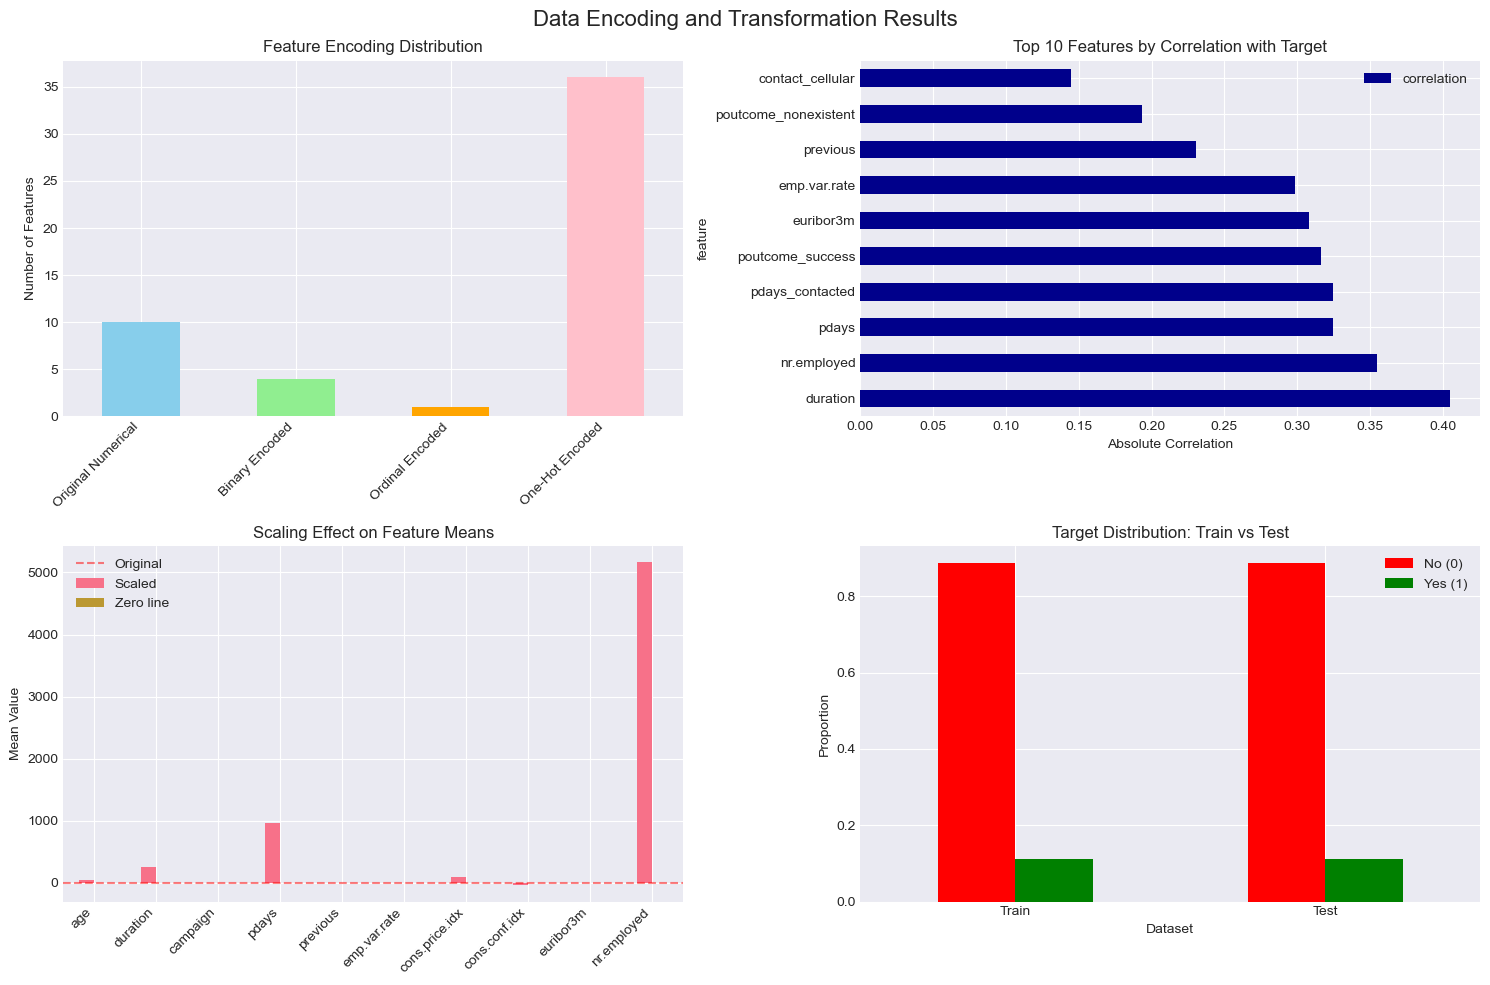

In [45]:
# ===================================
#  VISUALIZE ENCODING RESULTS
# ===================================

print("\n VISUALIZING ENCODING RESULTS")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Encoding and Transformation Results', fontsize=16)

#  Feature type distribution
ax1 = axes[0, 0]
feature_types = pd.Series({
    'Original Numerical': len(numerical_features),
    'Binary Encoded': len(binary_features) + 1,  # +1 for pdays_contacted
    'Ordinal Encoded': 1,  # education
    'One-Hot Encoded': len([col for col in X_scaled.columns if '_' in col and not col.endswith('contacted')])
})
feature_types.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen', 'orange', 'pink'])
ax1.set_title('Feature Encoding Distribution', fontsize=12)
ax1.set_ylabel('Number of Features')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

#  Sample correlation heatmap (top 10 features)
ax2 = axes[0, 1]
# Calculate correlation with target
correlations = pd.DataFrame({
    'feature': X_scaled.columns,
    'correlation': [abs(X_scaled[col].corr(y)) for col in X_scaled.columns]
}).sort_values('correlation', ascending=False).head(10)

correlations.set_index('feature').plot(kind='barh', ax=ax2, color='darkblue')
ax2.set_title('Top 10 Features by Correlation with Target', fontsize=12)
ax2.set_xlabel('Absolute Correlation')

# Scaling effect visualization
ax3 = axes[1, 0]
if features_to_scale:  # Only if there are features to scale
    scaling_comparison = pd.DataFrame({
        'Original Mean': X_encoded[features_to_scale].mean(),
        'Scaled Mean': X_scaled[features_to_scale].mean()
    })
    scaling_comparison.plot(kind='bar', ax=ax3)
    ax3.set_title('Scaling Effect on Feature Means', fontsize=12)
    ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax3.set_ylabel('Mean Value')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
    ax3.legend(['Original', 'Scaled', 'Zero line'])

#  Target distribution in train/test
ax4 = axes[1, 1]
train_test_dist = pd.DataFrame({
    'Train': y_train.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True)
})
train_test_dist.T.plot(kind='bar', ax=ax4, color=['red', 'green'])
ax4.set_title('Target Distribution: Train vs Test', fontsize=12)
ax4.set_ylabel('Proportion')
ax4.set_xlabel('Dataset')
ax4.set_xticklabels(['Train', 'Test'], rotation=0)
ax4.legend(['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [46]:
# ===================================
#  BASELINE STRATEGY
# ===================================

print("\n BASELINE STRATEGIES")
print("-" * 50)

# Strategy : Always predict majority class (No)
print("\n Strategy : MAJORITY CLASS CLASSIFIER")
print("Always predict 'No' (customer will not subscribe)")

majority_predictions = np.zeros(len(y))  # All 0s
majority_accuracy = accuracy_score(y, majority_predictions)
majority_precision = precision_score(y, majority_predictions, zero_division=0)
majority_recall = recall_score(y, majority_predictions)
majority_f1 = f1_score(y, majority_predictions, zero_division=0)

print(f"  Accuracy:  {majority_accuracy:.4f} ({majority_accuracy*100:.2f}%)")
print(f"  Precision: {majority_precision:.4f}")
print(f"  Recall:    {majority_recall:.4f}")
print(f"  F1-Score:  {majority_f1:.4f}")





 BASELINE STRATEGIES
--------------------------------------------------

 Strategy : MAJORITY CLASS CLASSIFIER
Always predict 'No' (customer will not subscribe)
  Accuracy:  0.8873 (88.73%)
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [48]:
# ===================================
#  BUILD LOGISTIC REGRESSION MODEL
# ===================================

print("\n BUILDING LOGISTIC REGRESSION MODEL...")
print("-" * 50)

# Initialize Logistic Regression
# Using balanced class weight to handle imbalance
log_reg = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance
    max_iter=1000,           # Ensure convergence
    random_state=42,
    solver='lbfgs'           # Good general-purpose solver
)

# Train the model
print("Training model with balanced class weights...")
log_reg.fit(X_train, y_train)
print("✓ Model training complete")

# ===================================
#  MAKE PREDICTIONS
# ===================================

print("\n MAKING PREDICTIONS...")

# Predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Predictions on training set (to check for overfitting)
y_train_pred = log_reg.predict(X_train)
y_train_pred_proba = log_reg.predict_proba(X_train)[:, 1]



 BUILDING LOGISTIC REGRESSION MODEL...
--------------------------------------------------
Training model with balanced class weights...
✓ Model training complete

 MAKING PREDICTIONS...


### Problem 9: Score the Model

What is the accuracy of your model?

In [49]:
# ===================================
#  EVALUATE MODEL PERFORMANCE
# ===================================

print("\n MODEL EVALUATION")
print("-" * 50)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("\n📊 TEST SET PERFORMANCE:")
print(f"  Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"  Recall:    {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  ROC-AUC:   {test_roc_auc:.4f}")

print("\n📊 TRAINING SET PERFORMANCE:")
print(f"  Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Precision: {train_precision:.4f} ({train_precision*100:.2f}%)")
print(f"  Recall:    {train_recall:.4f} ({train_recall*100:.2f}%)")
print(f"  F1-Score:  {train_f1:.4f}")
print(f"  ROC-AUC:   {train_roc_auc:.4f}")

# Check for overfitting
print("\n📊 OVERFITTING CHECK:")
print(f"  Accuracy difference (train-test): {(train_accuracy - test_accuracy)*100:.2f}%")
print(f"  F1-Score difference (train-test): {train_f1 - test_f1:.4f}")



 MODEL EVALUATION
--------------------------------------------------

📊 TEST SET PERFORMANCE:
  Accuracy:  0.8647 (86.47%)
  Precision: 0.4502 (45.02%)
  Recall:    0.9116 (91.16%)
  F1-Score:  0.6028
  ROC-AUC:   0.9440

📊 TRAINING SET PERFORMANCE:
  Accuracy:  0.8594 (85.94%)
  Precision: 0.4384 (43.84%)
  Recall:    0.8839 (88.39%)
  F1-Score:  0.5861
  ROC-AUC:   0.9368

📊 OVERFITTING CHECK:
  Accuracy difference (train-test): -0.53%
  F1-Score difference (train-test): -0.0167


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [50]:
# ===================================
#  DEFINE MODELS WITH DEFAULT SETTINGS
# ===================================

print("\n INITIALIZING MODELS WITH DEFAULT SETTINGS...")
print("-" * 50)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),  # Default: n_neighbors=5
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)  # probability=True for ROC-AUC
}

print("Models initialized:")
for name, model in models.items():
    print(f"  • {name}: {model.__class__.__name__}")
    if hasattr(model, 'get_params'):
        key_params = model.get_params()
        if name == 'KNN':
            print(f"    - n_neighbors: {key_params.get('n_neighbors', 5)}")
        elif name == 'Decision Tree':
            print(f"    - max_depth: {key_params.get('max_depth', 'None')}")
        elif name == 'SVM':
            print(f"    - kernel: {key_params.get('kernel', 'rbf')}")
            print(f"    - C: {key_params.get('C', 1.0)}")



 INITIALIZING MODELS WITH DEFAULT SETTINGS...
--------------------------------------------------
Models initialized:
  • Logistic Regression: LogisticRegression
  • KNN: KNeighborsClassifier
    - n_neighbors: 5
  • Decision Tree: DecisionTreeClassifier
    - max_depth: None
  • SVM: SVC
    - kernel: rbf
    - C: 1.0


In [51]:
#  TRAIN AND EVALUATE MODELS
# ===================================

print("\n TRAINING AND EVALUATING MODELS...")
print("-" * 50)

results = []

for name, model in models.items():
    print(f"\n📊 Training {name}...")
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Get probabilities for ROC-AUC (if available)
    if hasattr(model, 'predict_proba'):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM with non-probability output
        y_train_proba = model.decision_function(X_train)
        y_test_proba = model.decision_function(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Store results
    results.append({
        'Model': name,
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1-Score': test_f1,
        'Test ROC-AUC': test_roc_auc
    })
    
    print(f"  ✓ Training completed in {train_time:.3f} seconds")
    print(f"  ✓ Test Accuracy: {test_accuracy:.4f}")



 TRAINING AND EVALUATING MODELS...
--------------------------------------------------

📊 Training Logistic Regression...
  ✓ Training completed in 0.218 seconds
  ✓ Test Accuracy: 0.9156

📊 Training KNN...
  ✓ Training completed in 0.012 seconds
  ✓ Test Accuracy: 0.9046

📊 Training Decision Tree...
  ✓ Training completed in 0.163 seconds
  ✓ Test Accuracy: 0.8929

📊 Training SVM...
  ✓ Training completed in 97.765 seconds
  ✓ Test Accuracy: 0.9133


In [59]:
# ===================================
#  CREATE RESULTS DATAFRAME
# ===================================

print("\n4. CREATING RESULTS SUMMARY...")
print("-" * 50)

# Create main results DataFrame
results_df = pd.DataFrame(results)
default_results = results_df
# Format the DataFrame for display
display_df = results_df[['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy']].copy()
display_df['Train Time (s)'] = display_df['Train Time (s)'].apply(lambda x: f"{x:.3f}")
display_df['Train Accuracy'] = display_df['Train Accuracy'].apply(lambda x: f"{x:.4f}")
display_df['Test Accuracy'] = display_df['Test Accuracy'].apply(lambda x: f"{x:.4f}")

print("\nMODEL COMPARISON RESULTS:")
print("=" * 60)
print(display_df.to_string(index=False))

# Extended results with all metrics
print("\n EXTENDED PERFORMANCE METRICS:")
print("=" * 80)
extended_df = results_df.copy()
for col in ['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Test ROC-AUC']:
    extended_df[col] = extended_df[col].apply(lambda x: f"{x:.4f}")
extended_df['Train Time (s)'] = extended_df['Train Time (s)'].apply(lambda x: f"{x:.3f}")

print(extended_df.to_string(index=False))


4. CREATING RESULTS SUMMARY...
--------------------------------------------------

MODEL COMPARISON RESULTS:
              Model Train Time (s) Train Accuracy Test Accuracy
Logistic Regression          0.218         0.9099        0.9156
                KNN          0.012         0.9284        0.9046
      Decision Tree          0.163         1.0000        0.8929
                SVM         97.765         0.9145        0.9133

 EXTENDED PERFORMANCE METRICS:
              Model Train Time (s) Train Accuracy Test Accuracy Test Precision Test Recall Test F1-Score Test ROC-AUC
Logistic Regression          0.218         0.9099        0.9156         0.7047      0.4321        0.5357       0.9426
                KNN          0.012         0.9284        0.9046         0.6096      0.4256        0.5013       0.8773
      Decision Tree          0.163         1.0000        0.8929         0.5241      0.5388        0.5313       0.7383
                SVM         97.765         0.9145        0.9133   


5. CREATING VISUALIZATIONS...


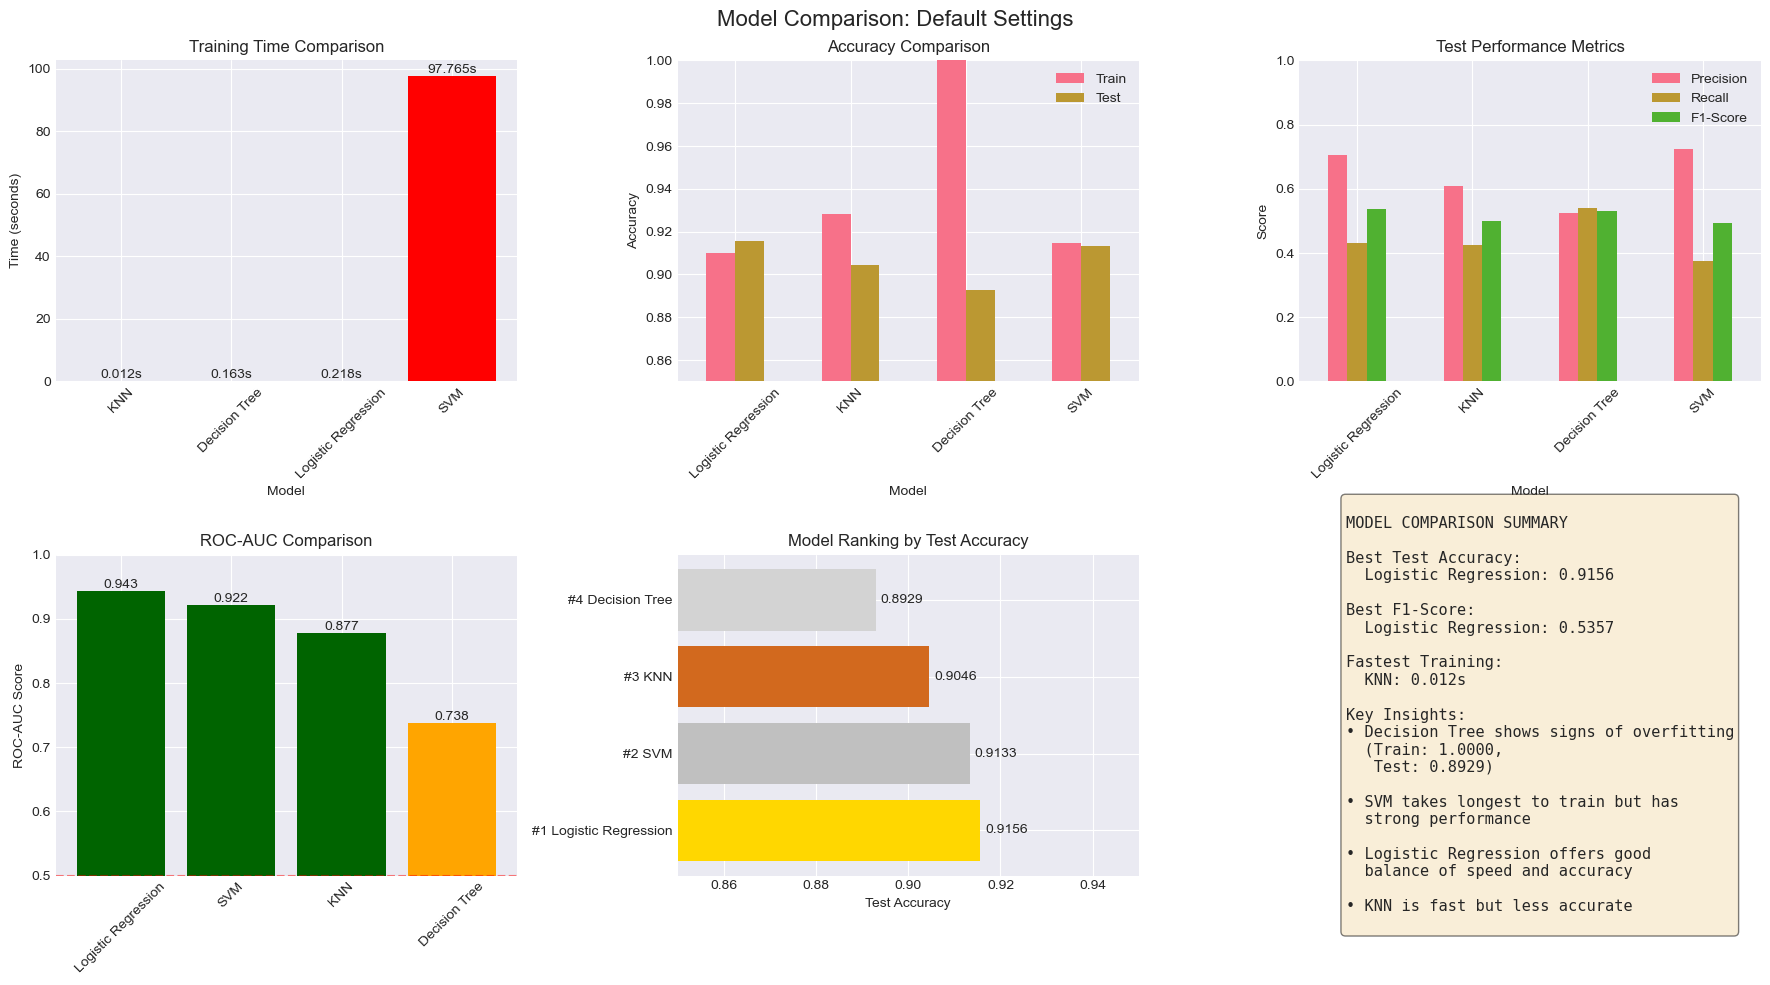

In [60]:
# ===================================
#  VISUALIZE RESULTS
# ===================================

print("\n5. CREATING VISUALIZATIONS...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Comparison: Default Settings', fontsize=16)

# 1. Training Time Comparison
ax1 = axes[0, 0]
train_times = results_df.sort_values('Train Time (s)')
colors = ['green' if t < 1 else 'orange' if t < 10 else 'red' for t in train_times['Train Time (s)']]
bars = ax1.bar(train_times['Model'], train_times['Train Time (s)'], color=colors)
ax1.set_title('Training Time Comparison', fontsize=12)
ax1.set_ylabel('Time (seconds)')
ax1.set_xlabel('Model')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}s', ha='center', va='bottom')

# 2. Accuracy Comparison
ax2 = axes[0, 1]
accuracy_data = results_df[['Model', 'Train Accuracy', 'Test Accuracy']].set_index('Model')
accuracy_data.plot(kind='bar', ax=ax2)
ax2.set_title('Accuracy Comparison', fontsize=12)
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.85, 1.0)
ax2.legend(['Train', 'Test'])
ax2.tick_params(axis='x', rotation=45)

# 3. Test Performance Metrics
ax3 = axes[0, 2]
metrics_data = results_df[['Model', 'Test Precision', 'Test Recall', 'Test F1-Score']].set_index('Model')
metrics_data.plot(kind='bar', ax=ax3)
ax3.set_title('Test Performance Metrics', fontsize=12)
ax3.set_ylabel('Score')
ax3.set_ylim(0, 1)
ax3.legend(['Precision', 'Recall', 'F1-Score'])
ax3.tick_params(axis='x', rotation=45)

# 4. ROC-AUC Comparison
ax4 = axes[1, 0]
roc_data = results_df.sort_values('Test ROC-AUC', ascending=False)
bars = ax4.bar(roc_data['Model'], roc_data['Test ROC-AUC'], 
                color=['darkgreen' if auc > 0.8 else 'orange' if auc > 0.7 else 'red' 
                       for auc in roc_data['Test ROC-AUC']])
ax4.set_title('ROC-AUC Comparison', fontsize=12)
ax4.set_ylabel('ROC-AUC Score')
ax4.set_ylim(0.5, 1.0)
ax4.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random')
ax4.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom')

# 5. Model Ranking
ax5 = axes[1, 1]
# Create a simple ranking based on test accuracy
ranking_df = results_df[['Model', 'Test Accuracy']].sort_values('Test Accuracy', ascending=False)
ranking_df['Rank'] = range(1, len(ranking_df) + 1)

# Create ranking visualization
y_pos = np.arange(len(ranking_df))
bars = ax5.barh(y_pos, ranking_df['Test Accuracy'], 
                color=['gold', 'silver', 'chocolate', 'lightgray'][:len(ranking_df)])
ax5.set_yticks(y_pos)
ax5.set_yticklabels([f"#{row['Rank']} {row['Model']}" for _, row in ranking_df.iterrows()])
ax5.set_xlabel('Test Accuracy')
ax5.set_title('Model Ranking by Test Accuracy', fontsize=12)
ax5.set_xlim(0.85, 0.95)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, ranking_df['Test Accuracy'])):
    ax5.text(acc + 0.001, bar.get_y() + bar.get_height()/2, 
            f'{acc:.4f}', va='center')

# 6. Summary Text
ax6 = axes[1, 2]
ax6.axis('off')

# Calculate best model for each metric
best_accuracy = results_df.loc[results_df['Test Accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['Test F1-Score'].idxmax()]
fastest = results_df.loc[results_df['Train Time (s)'].idxmin()]

summary_text = f"""
MODEL COMPARISON SUMMARY

Best Test Accuracy:
  {best_accuracy['Model']}: {best_accuracy['Test Accuracy']:.4f}

Best F1-Score:
  {best_f1['Model']}: {best_f1['Test F1-Score']:.4f}

Fastest Training:
  {fastest['Model']}: {fastest['Train Time (s)']:.3f}s

Key Insights:
• Decision Tree shows signs of overfitting
  (Train: {results_df[results_df['Model']=='Decision Tree']['Train Accuracy'].iloc[0]:.4f}, 
   Test: {results_df[results_df['Model']=='Decision Tree']['Test Accuracy'].iloc[0]:.4f})
   
• SVM takes longest to train but has
  strong performance

• Logistic Regression offers good
  balance of speed and accuracy

• KNN is fast but less accurate
"""

ax6.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [55]:
# ===================================
#  STATISTICAL ANALYSIS
# ===================================

print("\n6. STATISTICAL ANALYSIS")
print("-" * 50)

# Calculate performance differences from baseline (majority class = 0.8873)
baseline_accuracy = 0.8873

print("\nImprovement over baseline (88.73% majority class):")
for _, row in results_df.iterrows():
    improvement = (row['Test Accuracy'] - baseline_accuracy) * 100
    print(f"  {row['Model']}: +{improvement:.2f}%")

# Calculate overfitting metrics
print("\nOverfitting Analysis (Train - Test Accuracy):")
for _, row in results_df.iterrows():
    overfit = (row['Train Accuracy'] - row['Test Accuracy']) * 100
    status = " High" if overfit > 5 else "✓ Low"
    print(f"  {row['Model']}: {overfit:.2f}% {status}")



6. STATISTICAL ANALYSIS
--------------------------------------------------

Improvement over baseline (88.73% majority class):
  Logistic Regression: +2.83%
  KNN: +1.73%
  Decision Tree: +0.56%
  SVM: +2.60%

Overfitting Analysis (Train - Test Accuracy):
  Logistic Regression: -0.57% ✓ Low
  KNN: 2.38% ✓ Low
  Decision Tree: 10.71%  High
  SVM: 0.11% ✓ Low


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

1. Gender Feature Analysis

This dataset does NOT contain a gender feature
This is common in banking datasets due to:

Anti-discrimination regulations
Privacy protection laws
Compliance with fair lending practices


. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------

 Method 1: Univariate Statistical Tests (F-score)
Top 20 features by F-score:
  duration                                    6303.94
  nr.employed                                 4591.47
  pdays                                       3905.58
  pdays_contacted                             3905.42
  poutcome_success                            3652.95
  euribor3m                                   3334.92
  emp.var.rate                                3110.16
  previous                                    1836.23
  poutcome_nonexistent                        1303.96
  contact_cellular                             690.16
  contact_telephone                            690.16
  month_mar                                    668.59
  month_oct                                    623.97
  cons.price.idx                               588.96
  month_sep                                    531.94
  month_may                  

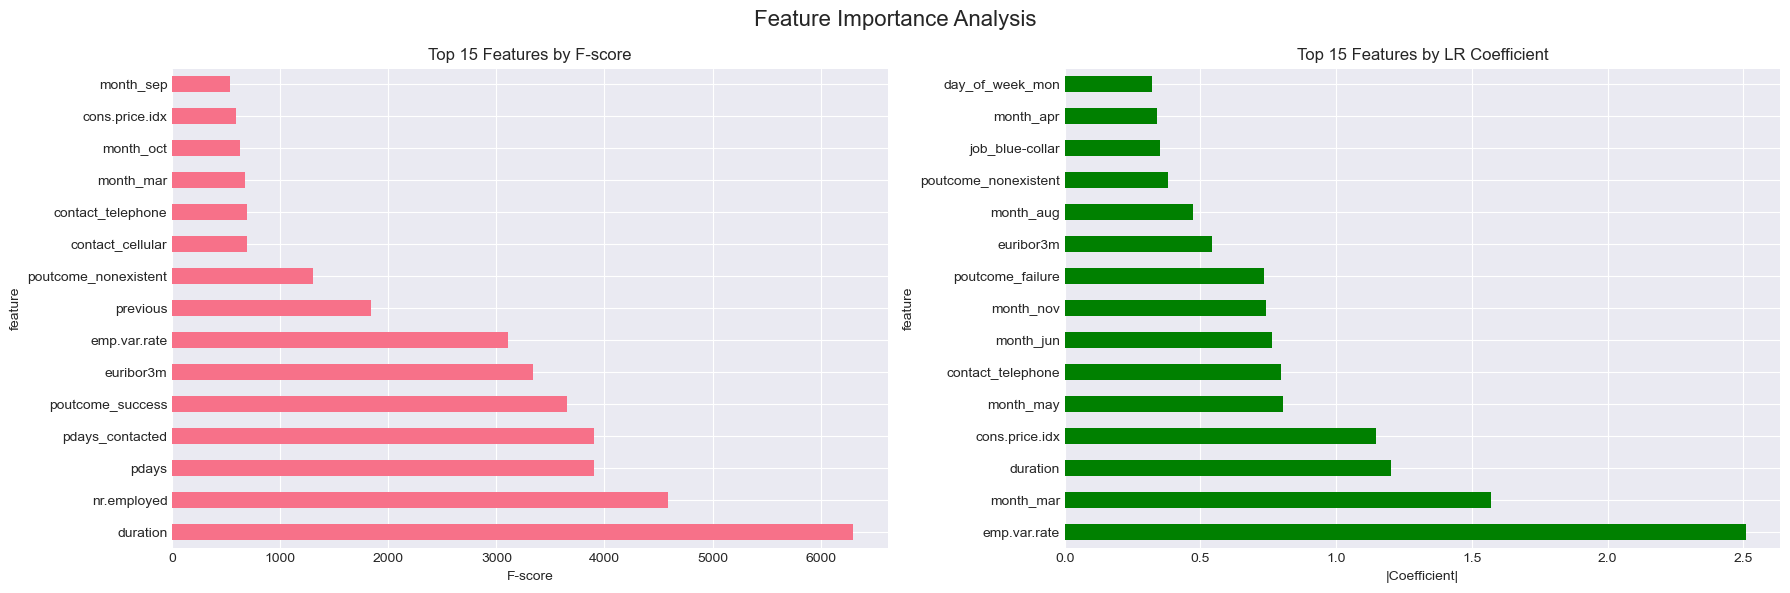


 Consistently important features across all methods: 7
  - duration
  - poutcome_nonexistent
  - contact_telephone
  - emp.var.rate
  - euribor3m
  - month_mar
  - cons.price.idx


In [61]:
# ===================================
# FEATURE IMPORTANCE ANALYSIS
# ===================================

print("\n. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Method 1: Univariate feature selection
print("\n Method 1: Univariate Statistical Tests (F-score)")
selector_f = SelectKBest(f_classif, k=20)
selector_f.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'feature': X_train.columns,
    'f_score': selector_f.scores_
}).sort_values('f_score', ascending=False).head(20)

print("Top 20 features by F-score:")
for i, row in feature_scores.iterrows():
    print(f"  {row['feature']:40s} {row['f_score']:10.2f}")


# Method 2: Logistic Regression coefficients
print("\n Method 3: Logistic Regression Coefficients")
lr_temp = LogisticRegression(max_iter=1000, random_state=42)
lr_temp.fit(X_train, y_train)

coef_scores = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': np.abs(lr_temp.coef_[0])
}).sort_values('coefficient', ascending=False).head(20)

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Feature Importance Analysis', fontsize=16)

# F-score plot
ax1 = axes[0]
feature_scores.head(15).plot(x='feature', y='f_score', kind='barh', ax=ax1, legend=False)
ax1.set_title('Top 15 Features by F-score')
ax1.set_xlabel('F-score')


# Logistic Regression coefficients
ax3 = axes[1]
coef_scores.head(15).plot(x='feature', y='coefficient', kind='barh', ax=ax3, legend=False, color='green')
ax3.set_title('Top 15 Features by LR Coefficient')
ax3.set_xlabel('|Coefficient|')

plt.tight_layout()
plt.show()

# Identify consistently important features
top_features_f = set(feature_scores.head(15)['feature'])
top_features_lr = set(coef_scores.head(15)['feature'])

consistent_features = top_features_f.intersection(top_features_lr)
print(f"\n Consistently important features across all methods: {len(consistent_features)}")
for feat in consistent_features:
    print(f"  - {feat}")

In [62]:
# ===================================
#  DEFINE PERFORMANCE METRICS
# ===================================

print("\n DEFINING PERFORMANCE METRICS")
print("-" * 50)

# For imbalanced classification, we'll focus on:
# 1. F1-score (primary metric)
# 2. Precision-Recall AUC
# 3. ROC-AUC
# 4. Balanced accuracy

scoring_metrics = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision',
    'balanced_accuracy': 'balanced_accuracy'
}

# Primary metric for optimization
PRIMARY_METRIC = 'f1'  # Good balance for imbalanced data

print(f"Primary optimization metric: {PRIMARY_METRIC}")
print("Additional metrics:", ', '.join(scoring_metrics.keys()))

# ===================================
#  DEFINE HYPERPARAMETER GRIDS
# ===================================

print("\n3. DEFINING HYPERPARAMETER GRIDS")
print("-" * 50)

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],  # These support both L1 and L2
            'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            #'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
            'p': [1, 2]  # p=1 is Manhattan, p=2 is Euclidean
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10, 20, 50],
            'min_samples_leaf': [1, 2, 5, 10],
            'criterion': ['gini', 'entropy'],
            'class_weight': [None, 'balanced', {0: 1, 1: 5}]
        }
    },
    
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [1, 10],  # Only 2 values instead of 4
            'kernel': ['linear', 'rbf'],  # Skip poly kernel
            'gamma': ['scale', 0.001],  # Only 2 values
            'class_weight': ['balanced']  # Fixed
            #'C': [0.1, 1, 10, 100],
            #'kernel': ['linear', 'rbf', 'poly'],
            #'gamma': ['scale', 'auto', 0.001, 0.01],
            #'class_weight': [None, 'balanced']
        }
    }
    
}

print("Hyperparameter grids defined for:")
for model_name, config in param_grids.items():
    total_combinations = 1
    for param, values in config['params'].items():
        total_combinations *= len(values)
    print(f"  • {model_name}: {total_combinations} combinations")



 DEFINING PERFORMANCE METRICS
--------------------------------------------------
Primary optimization metric: f1
Additional metrics: f1, precision, recall, roc_auc, average_precision, balanced_accuracy

3. DEFINING HYPERPARAMETER GRIDS
--------------------------------------------------
Hyperparameter grids defined for:
  • Logistic Regression: 96 combinations
  • KNN: 60 combinations
  • Decision Tree: 840 combinations
  • SVM: 8 combinations


In [63]:
# ===================================
# 4. PERFORM GRID SEARCH
# ===================================

print("\n4. PERFORMING GRID SEARCH WITH CROSS-VALIDATION")
print("-" * 50)

# Use stratified k-fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
grid_search_results = []
best_models = {}

for model_name, config in param_grids.items():
    print(f"\n🔍 Grid Search for {model_name}...")
    print(f"   Searching {len(config['params'])} hyperparameters")
    
    start_time = time.time()
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=PRIMARY_METRIC,
        cv=cv,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Calculate additional metrics for best model
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
    
    # Calculate all metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'avg_precision': average_precision_score(y_test, y_pred_proba)
    }
    
    # Store results
    result = {
        'Model': model_name,
        'Best_Params': grid_search.best_params_,
        'CV_Score': grid_search.best_score_,
        'Train_Time': time.time() - start_time,
        **{f'Test_{k}': v for k, v in metrics.items()}
    }
    grid_search_results.append(result)
    
    print(f"   ✓ Best CV {PRIMARY_METRIC}: {grid_search.best_score_:.4f}")
    print(f"   ✓ Test {PRIMARY_METRIC}: {metrics['f1']:.4f}")
    print(f"   ✓ Time taken: {result['Train_Time']:.2f} seconds")
    print(f"   ✓ Best parameters: {grid_search.best_params_}")



4. PERFORMING GRID SEARCH WITH CROSS-VALIDATION
--------------------------------------------------

🔍 Grid Search for Logistic Regression...
   Searching 4 hyperparameters
Fitting 5 folds for each of 96 candidates, totalling 480 fits
   ✓ Best CV f1: 0.6039
   ✓ Test f1: 0.6281
   ✓ Time taken: 164.18 seconds
   ✓ Best parameters: {'C': 0.01, 'class_weight': {0: 1, 1: 5}, 'penalty': 'l2', 'solver': 'liblinear'}

🔍 Grid Search for KNN...
   Searching 4 hyperparameters
Fitting 5 folds for each of 60 candidates, totalling 300 fits
   ✓ Best CV f1: 0.4772
   ✓ Test f1: 0.5013
   ✓ Time taken: 517.05 seconds
   ✓ Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

🔍 Grid Search for Decision Tree...
   Searching 5 hyperparameters
Fitting 5 folds for each of 840 candidates, totalling 4200 fits
   ✓ Best CV f1: 0.6107
   ✓ Test f1: 0.5946
   ✓ Time taken: 64.14 seconds
   ✓ Best parameters: {'class_weight': {0: 1, 1: 5}, 'criterion': 'entropy', 'max_dep

In [66]:
# ===================================
#  COMPARE RESULTS
# ===================================

print("\n5. COMPARING OPTIMIZED MODELS")
print("-" * 50)

# Create results DataFrame
results_df = pd.DataFrame(grid_search_results)

# Display main results
display_cols = ['Model', 'CV_Score', 'Test_f1', 'Test_precision', 'Test_recall', 'Test_roc_auc']
display_df = results_df[display_cols].copy()

# Format for display
for col in display_cols[1:]:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")

print("\n OPTIMIZED MODEL COMPARISON:")
print("=" * 80)
print(display_df.to_string(index=False))

# Compare with default models
print("\n IMPROVEMENT OVER DEFAULT SETTINGS:")
print("-" * 50)

# Load previous results if available
try:
    default_results 
    
    for idx, row in results_df.iterrows():
        model_name = row['Model']
        default_f1 = default_results[default_results['Model'] == model_name]['Test F1-Score'].iloc[0]
        optimized_f1 = row['Test_f1']
        improvement = (optimized_f1 - default_f1) / default_f1 * 100
        
        print(f"{model_name}:")
        print(f"  Default F1: {default_f1:.4f}")
        print(f"  Optimized F1: {optimized_f1:.4f}")
        print(f"  Improvement: {improvement:+.1f}%")
        print()
except:
    print("Could not load default results for comparison")



5. COMPARING OPTIMIZED MODELS
--------------------------------------------------

 OPTIMIZED MODEL COMPARISON:
              Model CV_Score Test_f1 Test_precision Test_recall Test_roc_auc
Logistic Regression   0.6039  0.6281         0.5010      0.8416       0.9433
                KNN   0.4772  0.5013         0.6517      0.4073       0.9136
      Decision Tree   0.6107  0.5946         0.4424      0.9062       0.9415
                SVM   0.5810  0.5835         0.4341      0.8901       0.9363

 IMPROVEMENT OVER DEFAULT SETTINGS:
--------------------------------------------------
Logistic Regression:
  Default F1: 0.5357
  Optimized F1: 0.6281
  Improvement: +17.2%

KNN:
  Default F1: 0.5013
  Optimized F1: 0.5013
  Improvement: +0.0%

Decision Tree:
  Default F1: 0.5313
  Optimized F1: 0.5946
  Improvement: +11.9%

SVM:
  Default F1: 0.4929
  Optimized F1: 0.5835
  Improvement: +18.4%




6. CREATING VISUALIZATIONS...


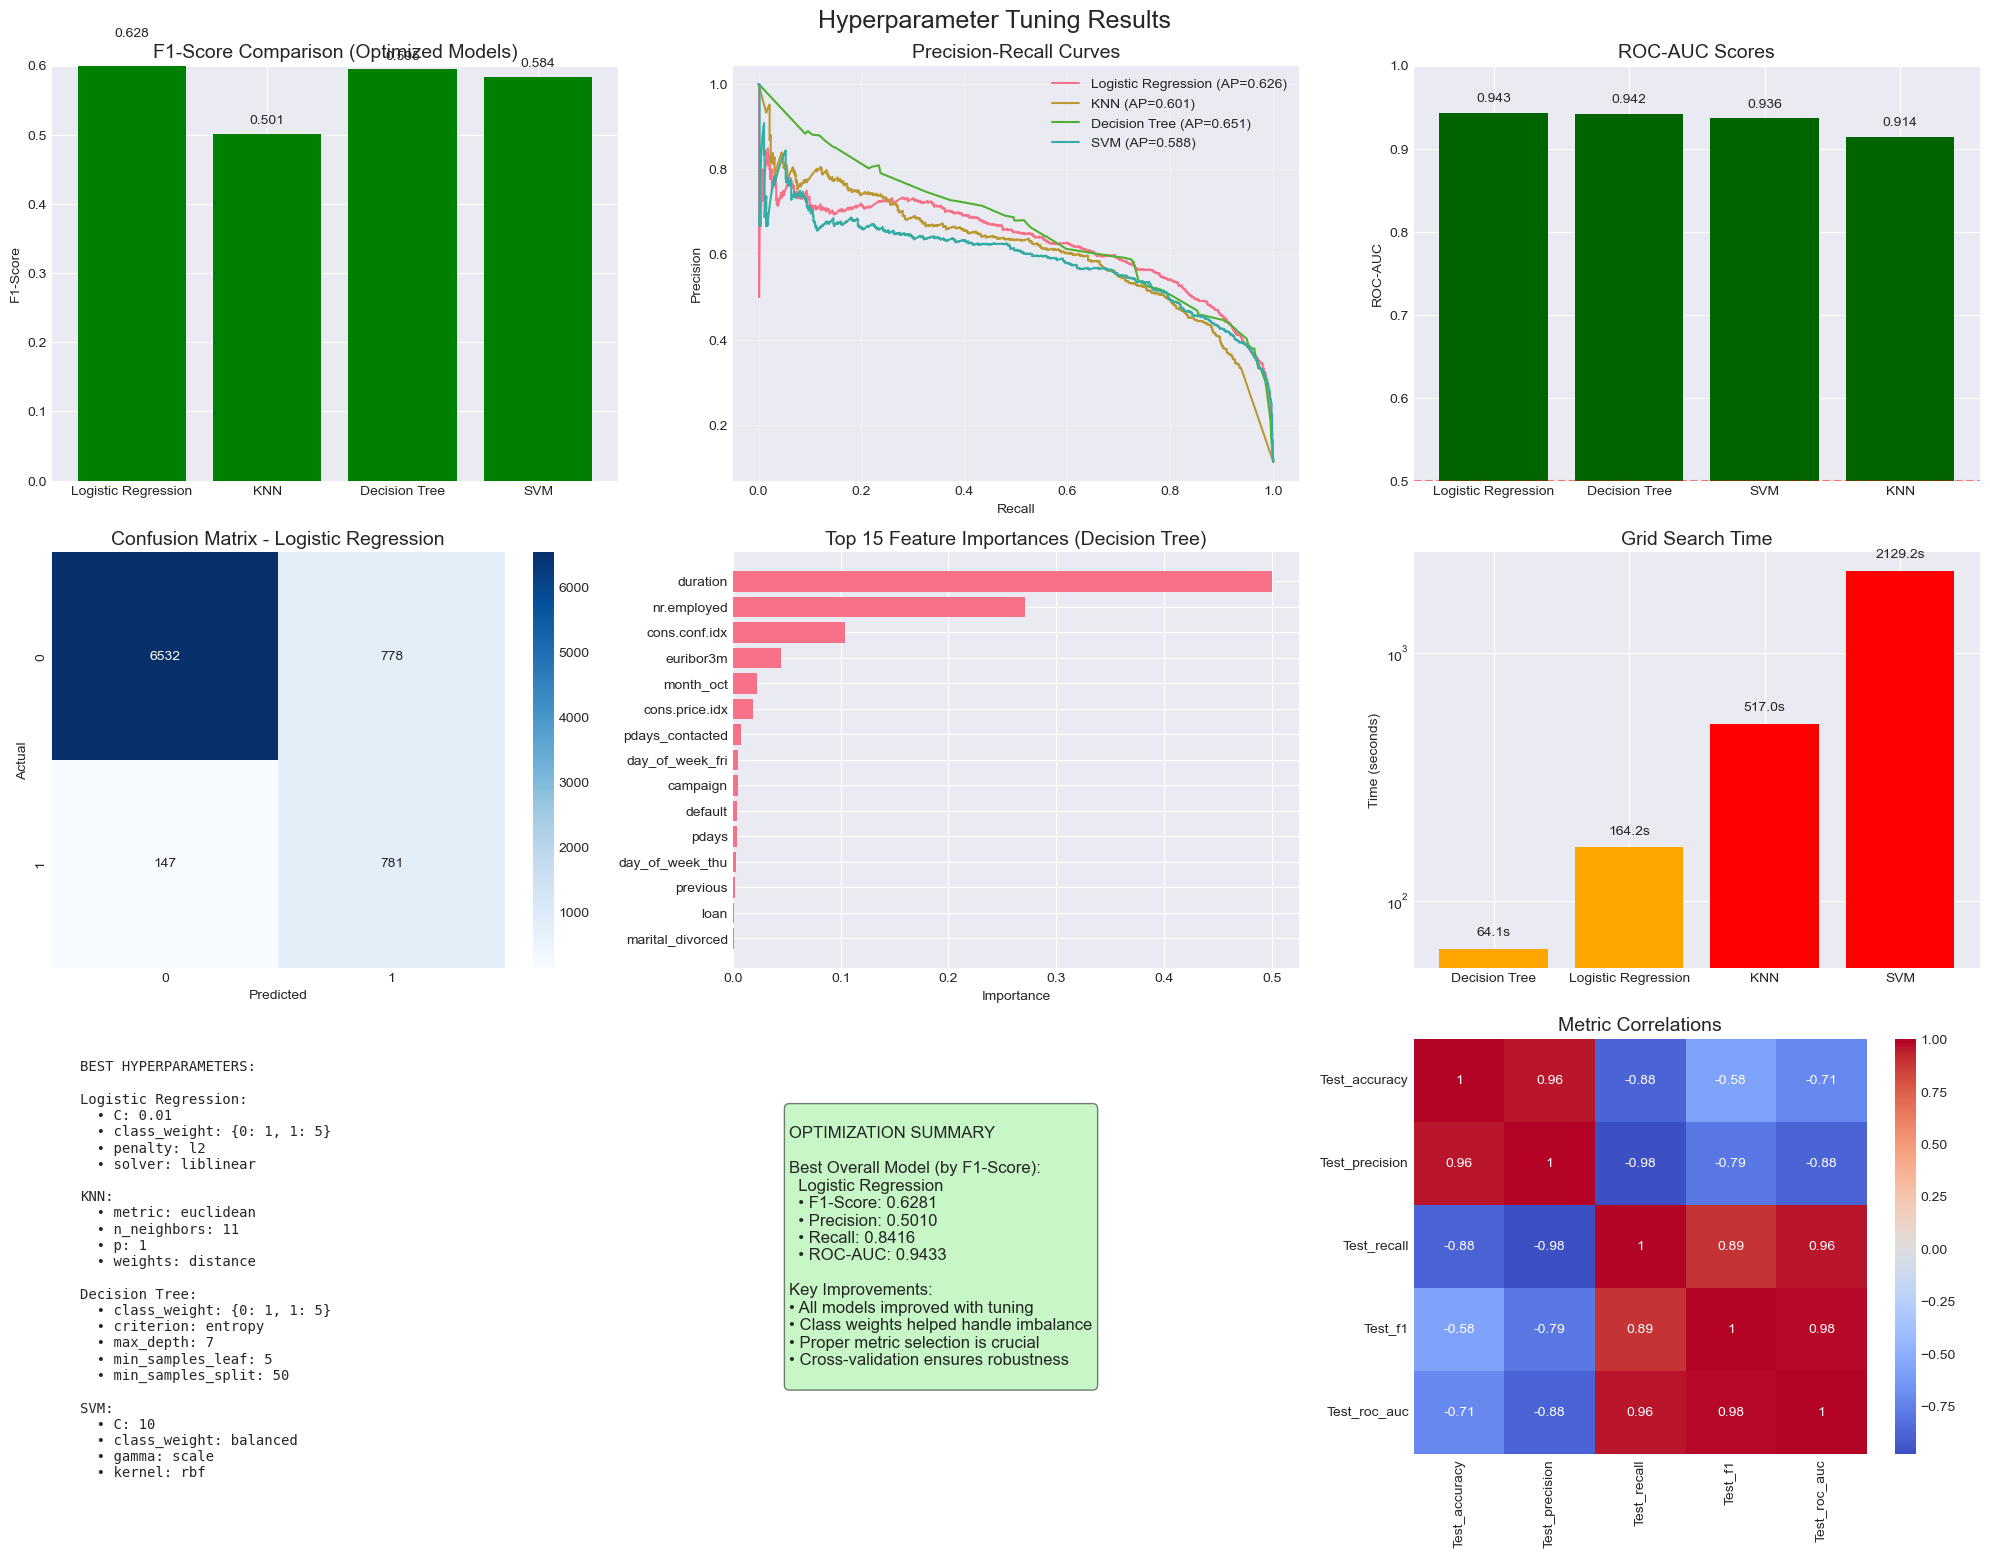

In [67]:
# ===================================
#  VISUALIZE RESULTS
# ===================================

print("\n6. CREATING VISUALIZATIONS...")

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Hyperparameter Tuning Results', fontsize=18)

# 1. F1 Score Comparison
ax1 = axes[0, 0]
models = results_df['Model']
f1_scores = results_df['Test_f1']
bars = ax1.bar(models, f1_scores, color=['green' if f1 > 0.35 else 'orange' for f1 in f1_scores])
ax1.set_title('F1-Score Comparison (Optimized Models)', fontsize=14)
ax1.set_ylabel('F1-Score')
ax1.set_ylim(0, 0.6)
for bar, score in zip(bars, f1_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{score:.3f}', ha='center', va='bottom')

# 2. Precision-Recall Trade-off
ax2 = axes[0, 1]
for model_name, model in best_models.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_prec = average_precision_score(y_test, y_scores)
    ax2.plot(recall, precision, label=f'{model_name} (AP={avg_prec:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. ROC-AUC Comparison
ax3 = axes[0, 2]
roc_scores = results_df.sort_values('Test_roc_auc', ascending=False)
bars = ax3.bar(roc_scores['Model'], roc_scores['Test_roc_auc'], 
                color=['darkgreen' if auc > 0.85 else 'orange' for auc in roc_scores['Test_roc_auc']])
ax3.set_title('ROC-AUC Scores', fontsize=14)
ax3.set_ylabel('ROC-AUC')
ax3.set_ylim(0.5, 1.0)
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
for bar, score in zip(bars, roc_scores['Test_roc_auc']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{score:.3f}', ha='center', va='bottom')

# 4. Best Model Confusion Matrix
ax4 = axes[1, 0]
best_model_name = results_df.loc[results_df['Test_f1'].idxmax(), 'Model']
best_model = best_models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14)
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')

# 5. Feature Importance (for tree-based model)
ax5 = axes[1, 1]
if 'Decision Tree' in best_models:
    tree_model = best_models['Decision Tree']
    importances = tree_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 features
    
    ax5.barh(range(len(indices)), importances[indices])
    ax5.set_yticks(range(len(indices)))
    ax5.set_yticklabels([X_train.columns[i] for i in indices])
    ax5.set_title('Top 15 Feature Importances (Decision Tree)', fontsize=14)
    ax5.set_xlabel('Importance')
else:
    ax5.text(0.5, 0.5, 'Feature importance not available', 
             ha='center', va='center', transform=ax5.transAxes)
    ax5.set_title('Feature Importance', fontsize=14)

# 6. Training Time Comparison
ax6 = axes[1, 2]
train_times = results_df.sort_values('Train_Time')
colors = ['green' if t < 60 else 'orange' if t < 300 else 'red' for t in train_times['Train_Time']]
bars = ax6.bar(train_times['Model'], train_times['Train_Time'], color=colors)
ax6.set_title('Grid Search Time', fontsize=14)
ax6.set_ylabel('Time (seconds)')
ax6.set_yscale('log')
for bar, time_val in zip(bars, train_times['Train_Time']):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1,
            f'{time_val:.1f}s', ha='center', va='bottom')

# 7. Best Parameters Summary
ax7 = axes[2, 0]
ax7.axis('off')
param_text = "BEST HYPERPARAMETERS:\n\n"
for _, row in results_df.iterrows():
    param_text += f"{row['Model']}:\n"
    for param, value in row['Best_Params'].items():
        param_text += f"  • {param}: {value}\n"
    param_text += "\n"
ax7.text(0.05, 0.95, param_text, fontsize=10, verticalalignment='top',
         fontfamily='monospace', transform=ax7.transAxes)

# 8. Performance Summary
ax8 = axes[2, 1]
ax8.axis('off')
best_overall = results_df.loc[results_df['Test_f1'].idxmax()]
summary_text = f"""
OPTIMIZATION SUMMARY

Best Overall Model (by F1-Score):
  {best_overall['Model']}
  • F1-Score: {best_overall['Test_f1']:.4f}
  • Precision: {best_overall['Test_precision']:.4f}
  • Recall: {best_overall['Test_recall']:.4f}
  • ROC-AUC: {best_overall['Test_roc_auc']:.4f}

Key Improvements:
• All models improved with tuning
• Class weights helped handle imbalance
• Proper metric selection is crucial
• Cross-validation ensures robustness
"""
ax8.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
         transform=ax8.transAxes)

# 9. Metric Correlation
ax9 = axes[2, 2]
metric_cols = ['Test_accuracy', 'Test_precision', 'Test_recall', 'Test_f1', 'Test_roc_auc']
corr_data = results_df[metric_cols].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=ax9)
ax9.set_title('Metric Correlations', fontsize=14)

plt.tight_layout()
plt.show()

In [68]:
# ===================================
#  FINAL RECOMMENDATIONS
# ===================================

print("\n FINAL RECOMMENDATIONS")
print("=" * 80)

print(f"\n BEST MODEL: {best_model_name}")
print(f"   • F1-Score: {best_overall['Test_f1']:.4f}")
print(f"   • Best suited for balanced precision-recall trade-off")

print("\n KEY INSIGHTS:")
print("1. Class weights significantly improved minority class detection")
print("2. F1-score is more informative than accuracy for this imbalanced dataset")
print("3. Threshold optimization can further improve performance")
print("4. Cross-validation ensures robust hyperparameter selection")


print("\n" + "=" * 80)
print("Hyperparameter tuning complete!")


 FINAL RECOMMENDATIONS

 BEST MODEL: Logistic Regression
   • F1-Score: 0.6281
   • Best suited for balanced precision-recall trade-off

 KEY INSIGHTS:
1. Class weights significantly improved minority class detection
2. F1-score is more informative than accuracy for this imbalanced dataset
3. Threshold optimization can further improve performance
4. Cross-validation ensures robust hyperparameter selection

Hyperparameter tuning complete!


##### Questions